# 4.4 連続型確率分布

In [2]:
using Distributions
using PyPlot

In [3]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
end

set_options (generic function with 1 method)

## 4.4.2 正規分布

In [4]:
# パラメータ
μ = 0.0
σ = 1.0

# 正規分布の作成
d = Normal(μ, σ)

Normal{Float64}(μ=0.0, σ=1.0)

In [5]:
# サンプリング
X = rand(d, 10000)
X'

1×10000 adjoint(::Vector{Float64}) with eltype Float64:
 -1.75139  0.19419  0.873474  0.0955433  …  0.326622  0.0805115  -0.00648756

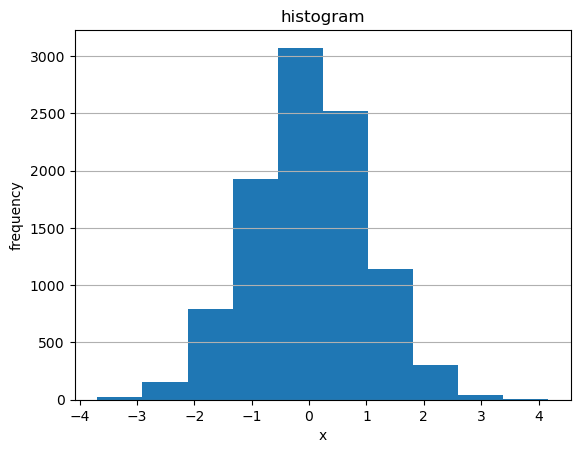

false

In [6]:
fig, ax = subplots()
ax.hist(X)
set_options(ax, "x", "frequency", "histogram"; gridy=true)

In [7]:
println("mean(exact) = $(mean(d)), mean(approx) = $(mean(X))")

mean(exact) = 0.0, mean(approx) = -0.01070947450653293


In [8]:
println("std(exact) = $(std(d)), std(approx) = $(std(X))")

std(exact) = 1.0, std(approx) = 1.0080374465316146


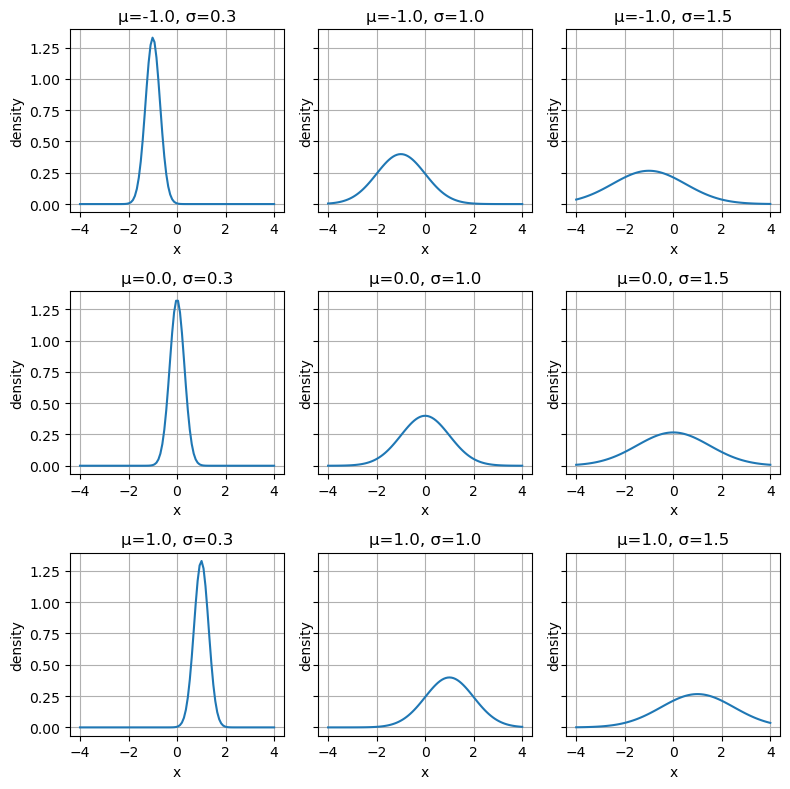

In [9]:
# 表示範囲は-4から4までとする
xs = range(-4, 4, length=100)

# パラメータのリスト
μs = [-1.0, 0.0, 1.0]
σs = [0.3, 1.0, 1.5]

fig, axes = subplots(length(μs), length(σs), sharey=true, figsize=(8,8))
for (i, μ) in enumerate(μs)
    for (j, σ) in enumerate(σs)
        d = Normal(μ, σ)
        axes[i,j].plot(xs, pdf.(d, xs))        
        set_options(axes[i,j], "x", "density", "μ=$(μ), σ=$(σ)")
    end
end
tight_layout()

In [10]:
μ = 0.0
σ = 0.2
d = Normal(μ, σ)
pdf(d, 0.1)

1.7603266338214976

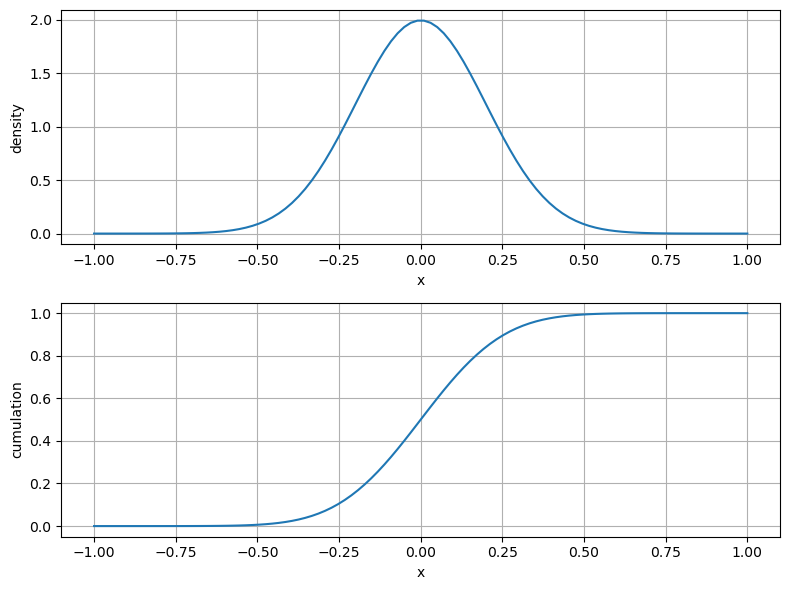

In [14]:
xs = range(-1, 1, length=100)
fig, axes = subplots(2,1, figsize=(8,6))

# 正規分布の確率密度関数をプロット
axes[1].plot(xs, pdf.(d, xs))
set_options(axes[1], "x", "density", "")

# 累積分布関数をプロット
axes[2].plot(xs, cdf.(d, xs))
set_options(axes[2], "x", "cumulation", "")

tight_layout()

In [15]:
cdf(d, 0.2) - cdf(d, 0.0)

0.34134474606854304

In [17]:
X = rand(d, 10000)

# 0.0から0.2に入ったサンプルの割合を求める
mean(0.0 .< X .< 0.2)

0.3404

### 尤度(likelihood)

In [18]:
μ = 0.0
σ = 1.0
d = Normal(μ, σ)

Normal{Float64}(μ=0.0, σ=1.0)

In [19]:
X_obs = [0.1, -0.1, 0.2, 0.5]
pdf.(d, X_obs)

4-element Vector{Float64}:
 0.3969525474770118
 0.3969525474770118
 0.3910426939754559
 0.3520653267642995

In [20]:
prod(pdf.(d, X_obs))

0.021693249867975634

### 対数尤度

In [21]:
lp = sum(logpdf.(d, X_obs))
println("logpdf = $(lp)")

# 元のpdfに戻す
println("pdf = $(exp(lp))")

logpdf = -3.830754132818691
pdf = 0.021693249867975627
